<a href="https://colab.research.google.com/github/JMandal02/Data-Science_pwskills/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1
**What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.**

### Answer:

Deep Learning is a subfield of Machine Learning that uses **artificial neural networks with multiple hidden layers** to learn complex patterns from large amounts of data. These networks are inspired by the structure and functioning of the human brain.

### Evolution of Deep Learning:
- **1950s–1980s:** Perceptron and basic neural networks were introduced, but limited by low computational power.
- **1990s:** Backpropagation algorithm improved training of neural networks.
- **2006 onwards:** Availability of big data, powerful GPUs, and improved algorithms (ReLU, Adam, CNNs) led to the rise of deep learning.
- **Present:** Deep learning powers applications like image recognition, speech recognition, NLP, and autonomous vehicles.

### Difference between Traditional ML and Deep Learning:

| Traditional Machine Learning | Deep Learning |
|------------------------------|---------------|
| Requires manual feature engineering | Automatically learns features |
| Works well with small datasets | Requires large datasets |
| Shallow models (1–2 layers) | Deep models (many layers) |
| Less computationally intensive | Computationally expensive |


## Question 2
**Explain the basic architecture and functioning of a Perceptron. What are its limitations?**

### Answer:

A Perceptron is the **simplest form of an artificial neural network**, used for binary classification.

### Architecture of a Perceptron:
- **Input layer:** Takes input features (x₁, x₂, ..., xₙ)
- **Weights:** Each input is multiplied by a weight
- **Bias:** Added to the weighted sum
- **Summation:** Computes weighted sum
- **Activation function:** Produces output (usually step function)

### Functioning:
1. Inputs are multiplied by weights.
2. Bias is added.
3. Activation function determines the output.
4. Weights are updated using error correction learning.

### Limitations:
- Can only solve **linearly separable problems**
- Cannot solve XOR problem
- Single-layer only
- Limited learning capacity


## Question 3
**Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.**

### Answer:

Activation functions introduce **non-linearity** into neural networks, enabling them to learn complex patterns.

Without activation functions, neural networks behave like linear models.

### Comparison of Activation Functions:

| Function | Formula | Range | Advantages | Disadvantages |
|--------|--------|-------|------------|---------------|
| Sigmoid | 1 / (1 + e⁻ˣ) | (0, 1) | Smooth, probabilistic output | Vanishing gradient |
| Tanh | (eˣ − e⁻ˣ)/(eˣ + e⁻ˣ) | (-1, 1) | Zero-centered | Still vanishing gradient |
| ReLU | max(0, x) | [0, ∞) | Fast, avoids vanishing gradient | Dead neurons |

ReLU is most commonly used in deep networks.


## Question 4
**What is the difference between Loss function and Cost function in neural networks? Provide examples.**

### Answer:

### Loss Function:
- Measures error for **a single training sample**
- Used during training to update weights

**Examples:**
- Mean Squared Error (MSE)
- Binary Cross-Entropy

### Cost Function:
- Average loss over **entire dataset**
- Represents overall model performance

### Difference Summary:

| Loss Function | Cost Function |
|--------------|---------------|
| Single sample error | Dataset-wide error |
| Used at instance level | Used at model level |


## Question 5
**What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.**

### Answer:

Optimizers update model weights to **minimize the loss function** efficiently.

### Comparison of Optimizers:

| Optimizer | Description | Advantages | Disadvantages |
|---------|-------------|------------|---------------|
| Gradient Descent | Updates weights using full dataset | Stable | Slow |
| RMSprop | Adaptive learning rate | Faster convergence | Needs tuning |
| Adam | Combines momentum + RMSprop | Fast and efficient | Slightly memory intensive |

Adam is the most commonly used optimizer in deep learning.


## Question 6
**Implement a single-layer perceptron using NumPy to solve AND gate**


In [1]:
import numpy as np

# AND gate dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

# Initialize weights and bias
weights = np.zeros(2)
bias = 0
lr = 0.1

# Training
for epoch in range(10):
    for i in range(len(X)):
        y_pred = 1 if np.dot(X[i], weights) + bias >= 0 else 0
        error = y[i] - y_pred
        weights += lr * error * X[i]
        bias += lr * error

print("Weights:", weights)
print("Bias:", bias)


Weights: [0.2 0.1]
Bias: -0.20000000000000004


## Question 7
**Implement and visualize Sigmoid, ReLU, and Tanh activation functions
using Matplotlib.**


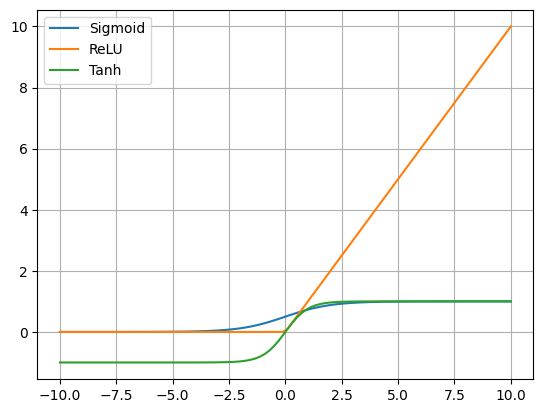

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)

plt.plot(x, sigmoid, label="Sigmoid")
plt.plot(x, relu, label="ReLU")
plt.plot(x, tanh, label="Tanh")
plt.legend()
plt.grid()
plt.show()


## Question 8
**Use Keras to build and train a simple multilayer neural network on the
MNIST digits dataset. Print the training accuracy.**


In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(X_train, y_train), _ = mnist.load_data()

X_train = X_train / 255.0
y_train = to_categorical(y_train)

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=32)

print("Training Accuracy:", history.history['accuracy'][-1])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8806 - loss: 0.4292
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9637 - loss: 0.1223
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9758 - loss: 0.0826
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9822 - loss: 0.0585
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9864 - loss: 0.0441
Training Accuracy: 0.9854166507720947


## Question 9
**Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.**

### Answer:

In this question, we train a neural network on the **Fashion MNIST dataset** and visualize:

- Training Loss vs Epochs
- Training Accuracy vs Epochs

These curves help us understand:
- How well the model is learning
- Whether the model is underfitting or overfitting
- Stability of training

Fashion MNIST contains 28×28 grayscale images of clothing items such as shirts, shoes, and bags.


In [4]:
# Import libraries
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7830 - loss: 0.6329 - val_accuracy: 0.8377 - val_loss: 0.4551
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8607 - loss: 0.3871 - val_accuracy: 0.8476 - val_loss: 0.4229
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8755 - loss: 0.3426 - val_accuracy: 0.8657 - val_loss: 0.3789
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8839 - loss: 0.3155 - val_accuracy: 0.8733 - val_loss: 0.3506
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8901 - loss: 0.2982 - val_accuracy: 0.8721 - val_loss: 0.3590
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8969 - loss: 0.2835 - val_accuracy: 0.8790 - val_loss: 0.3395
Epoch 7/10
1875/1875 ━━━━━━━

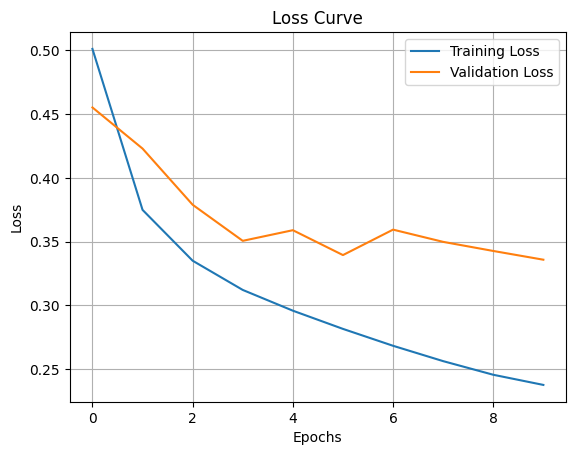

In [5]:
# Plot Loss Curve
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid()
plt.show()


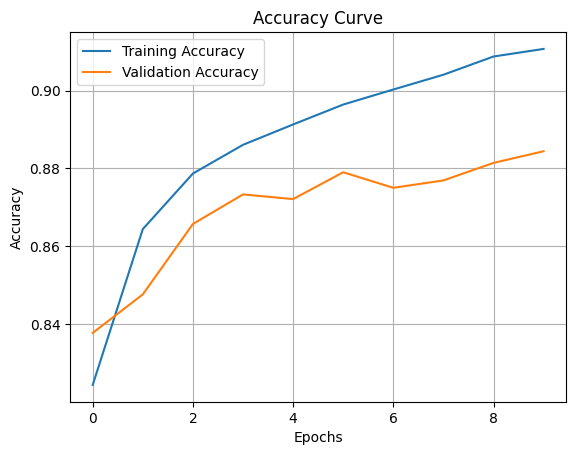

In [6]:
# Plot Accuracy Curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.grid()
plt.show()


## Question 10

You are working on a project for a bank that wants to automatically detect
fraudulent transactions. The dataset is large, imbalanced, and contains structured
features like transaction amount, merchant ID, and customer location. The goal is to
classify each transaction as fraudulent or legitimate.

Explain your real-time data science workflow:

- How would you design a deep learning model (perceptron or multilayer NN)?
- Which activation function and loss function would you use, and why?
- How would you train and evaluate the model, considering class imbalance?
- Which optimizer would be suitable, and how would you prevent overfitting?

---

## Answer

### 1. Deep Learning Model Design

For fraudulent transaction detection, a **Multilayer Neural Network (MLP)** is more
appropriate than a single perceptron because fraud patterns are complex and non-linear.

**Model Design:**
- Input Layer: Transaction features (amount, merchant ID, location, etc.)
- Hidden Layers: Multiple dense layers with ReLU activation
- Output Layer: Single neuron with Sigmoid activation for binary classification

---

### 2. Activation Function and Loss Function

**Activation Functions:**
- **ReLU** is used in hidden layers because it improves learning speed and avoids the
  vanishing gradient problem.
- **Sigmoid** is used in the output layer to produce probability values between 0 and 1.

**Loss Function:**
- **Binary Cross-Entropy Loss** is used because the task involves binary classification
  (fraudulent vs legitimate).

---

### 3. Training and Evaluation with Class Imbalance

Since fraudulent transactions are rare, the dataset is highly imbalanced.

To handle class imbalance:
- Apply **class weighting** to give more importance to fraud cases
- Use **oversampling techniques** such as SMOTE
- Evaluate the model using:
  - Precision
  - Recall
  - F1-score
  - ROC-AUC instead of accuracy

---

### 4. Optimizer and Overfitting Prevention

**Optimizer:**
- **Adam optimizer** is suitable due to adaptive learning rates and fast convergence.

**Overfitting Prevention:**
- Dropout layers
- L2 regularization
- Early stopping
- Validation-based monitoring



In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Simulated dataset (for demonstration)
np.random.seed(42)
X = np.random.rand(5000, 10)   # 10 transaction features
y = np.random.choice([0, 1], size=(5000,), p=[0.95, 0.05])  # Imbalanced target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))

# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    class_weight=class_weight_dict,
    validation_split=0.2,
    verbose=1
)

# Evaluate model
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8085 - loss: 0.6829 - val_accuracy: 0.1725 - val_loss: 0.7205
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3720 - loss: 0.7376 - val_accuracy: 0.3162 - val_loss: 0.7074
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4764 - loss: 0.7076 - val_accuracy: 0.1762 - val_loss: 0.7266
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4132 - loss: 0.6642 - val_accuracy: 0.1562 - val_loss: 0.7264
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3212 - loss: 0.6815 - val_accuracy: 0.1963 - val_loss: 0.7299
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3742 - loss: 0.7000 - val_accuracy: 0.2463 - val_loss: 0.7236
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3648 - loss: 0.7249 - val_accuracy: 0.3963 - val_loss: 0.7061
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4642 - loss: 0.7167 - val_accuracy: 